# Introdução

## **Interface cérebro-máquina**

A utilização de interfaces cérebro-máquina encontra espaço nas mais diversas áreas de conhecimento. Este tipo de sistema se baseia na extração de sinais cerebrais que são posteriormente usados para diferentes finalidades, como: entretenimento, controle de próteses, soletradores digitais, entre outros. A comunicação do cérebro com a máquina tem potencial de se tornar um poderoso canal de comunicação, permitindo até mesmo o controle de diversos dispositivos utilizando apenas o pensamento.

Existem diversas técnicas para se extrair os sinais cerebrais, seja de forma invasiva ou não-invasiva. O modo mais correntemente utilizado por sua simplicidade e facilidade é o eletroencefalograma (EEG), cujo é capturado através do uso de capacetes dotados de eletrodos dedicados à leitura destes sinais diretamente do escalpo, sem nenhuma intervenção cirúrgica.

O cérebro é capaz de emitir os mais diversos tipos de sinais e, entre eles, o chamado P300 é um dos mais amplamente manuseados. Este nome refere-se a sua característica de aparecer aproximadamente 300 milissegundos depois de algum evento de estímulo, podendo variar por fatores físicos e psicológicos individuais. Por conta desta característica baseada em eventos, esse sinal se encaixa na chamada categoria *Event Related Potential* (ERP).



## **Eletroencefalograma**

O EEG é uma forma de aquisição de sinais não-invasiva que captura, através de eletrodos posicionados de forma padronizada, os impulsos elétricos provenientes do córtex cerebral. O sistema de posicionamento comumente utilizado é o 10-20.

Neste sistema, cada letra é usada para identificar o lobo ou área do cérebro que está sendo lida:


* Pré-frontal (Fp)
* Frontal (F)
* Temporal (T)
* Parietal (P)
* Occipital (O)
* Central (C)

Além disso, a letra "Z" é utilizada para referir-se aos eletrodos posicionados no plano sagital da linha média do crânio. Ademais, números pares são usados para identificar o lado direito da cabeça, enquanto que os ímpares representam o lado esquerdo. Os eletrodos localizados na parte posterior da orelha são identificados com a letra "A" e são comumente empregados como uma referência para análise dos sinais.

A figura abaixo mostra a disposição dos eletrodos no sistema mencionado (TMSi, 2022):

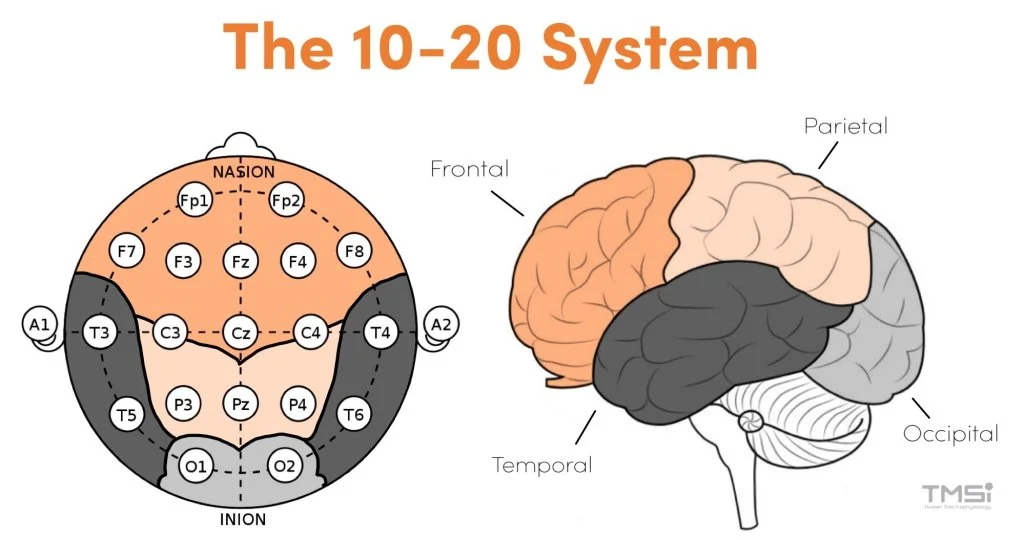

Outros modos de captura de EEG podem ser utilizados para aumentar a resolução, adicionando eletrodos extras dentro do padrão 10-20, resultando em uma maior densidade de análise. A figura abaixo mostra o sistema 10-10 com essas modificações (TMSi, 2022):

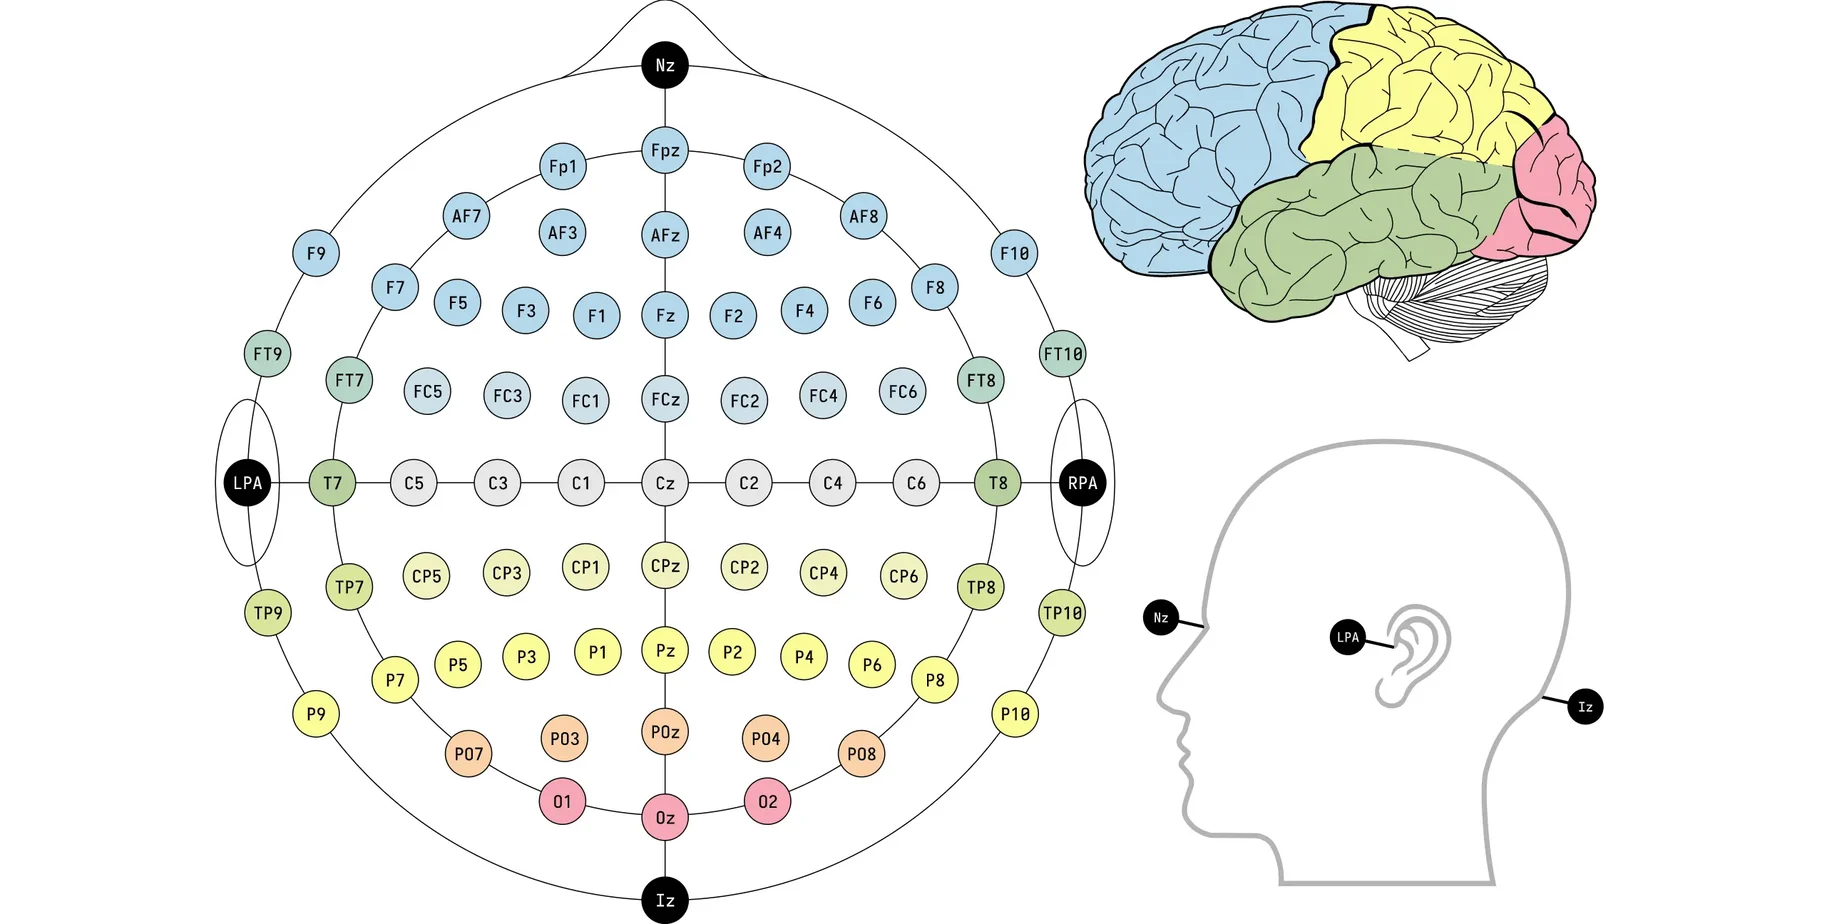




## **P300**

Interfaces cérebro-máquina são comumente utilizadas por meio do chamado *oddball paradigm*, no qual o aparecimento de um item infrequente (*target*) elicita um potencial P300 relacionado ao evento ocorrido (ERP - *Event Related Potential*) (Wolpaw, 2002).

Por meio de flashes contínuos, é possível estimar a probabilidade de cada símbolo ser o que foi selecionado pelo usuário. Isto é obtido através da avaliação do P300 emitido por cada símbolo uma vez que é iluminado. Um conjunto completo de flashes deve ser feito para obter uma estimativa confiável através da média das tentativas (Congedo et al., 2011).

Através de uma série de repetições é possível calibrar o classificador para entender o funcionamento individual do cérebro de cada pessoa, possibilitando uma acurácia maior a cada sessão realizada.

## **Classificação de sinais**

Uma das etapas mais importantes para habilitar a utilização de interfaces cérebro-máquina é a classificação correta do sinal. Após classificar e identificar positivamente a característica desejada, esta informação é transferida para o dispositivo que então é responsável por efetuar alguma ação, como: mover uma prótese, selecionar uma letra, ligar/desligar algum aparelho, etc.

Diversos algoritmos classificatórios de inteligência artificial podem ser aplicados para efetuar esta etapa, mas o que irá ser abordado neste trabalho é a rede neural convolucional (CNN).

Embora a CNN seja comumente utilizada para tarefas relacionadas à imagens, é possível adaptar os sinais provenientes do EEG para usar este tipo de algoritmo. Para isso, podemos considerar os dados do EEG como um vetor bidimensional, com o tempo visto como a largura e o os canais de captura como a altura.

Dispostos dessa forma, os dados provenientes do EEG possuem características semelhantes às imagens, no sentido de que pontos temporais próximos influenciam o ponto em análise, bem como eletrodos próximos influenciam uns aos outros. A figura abaixo demonstra um exemplo de EEG bidimensional em uma janela de tempo de 2 segundos em função da amplitude dos eletrodos FZ, C3 e PO8 (Boer, 2022):

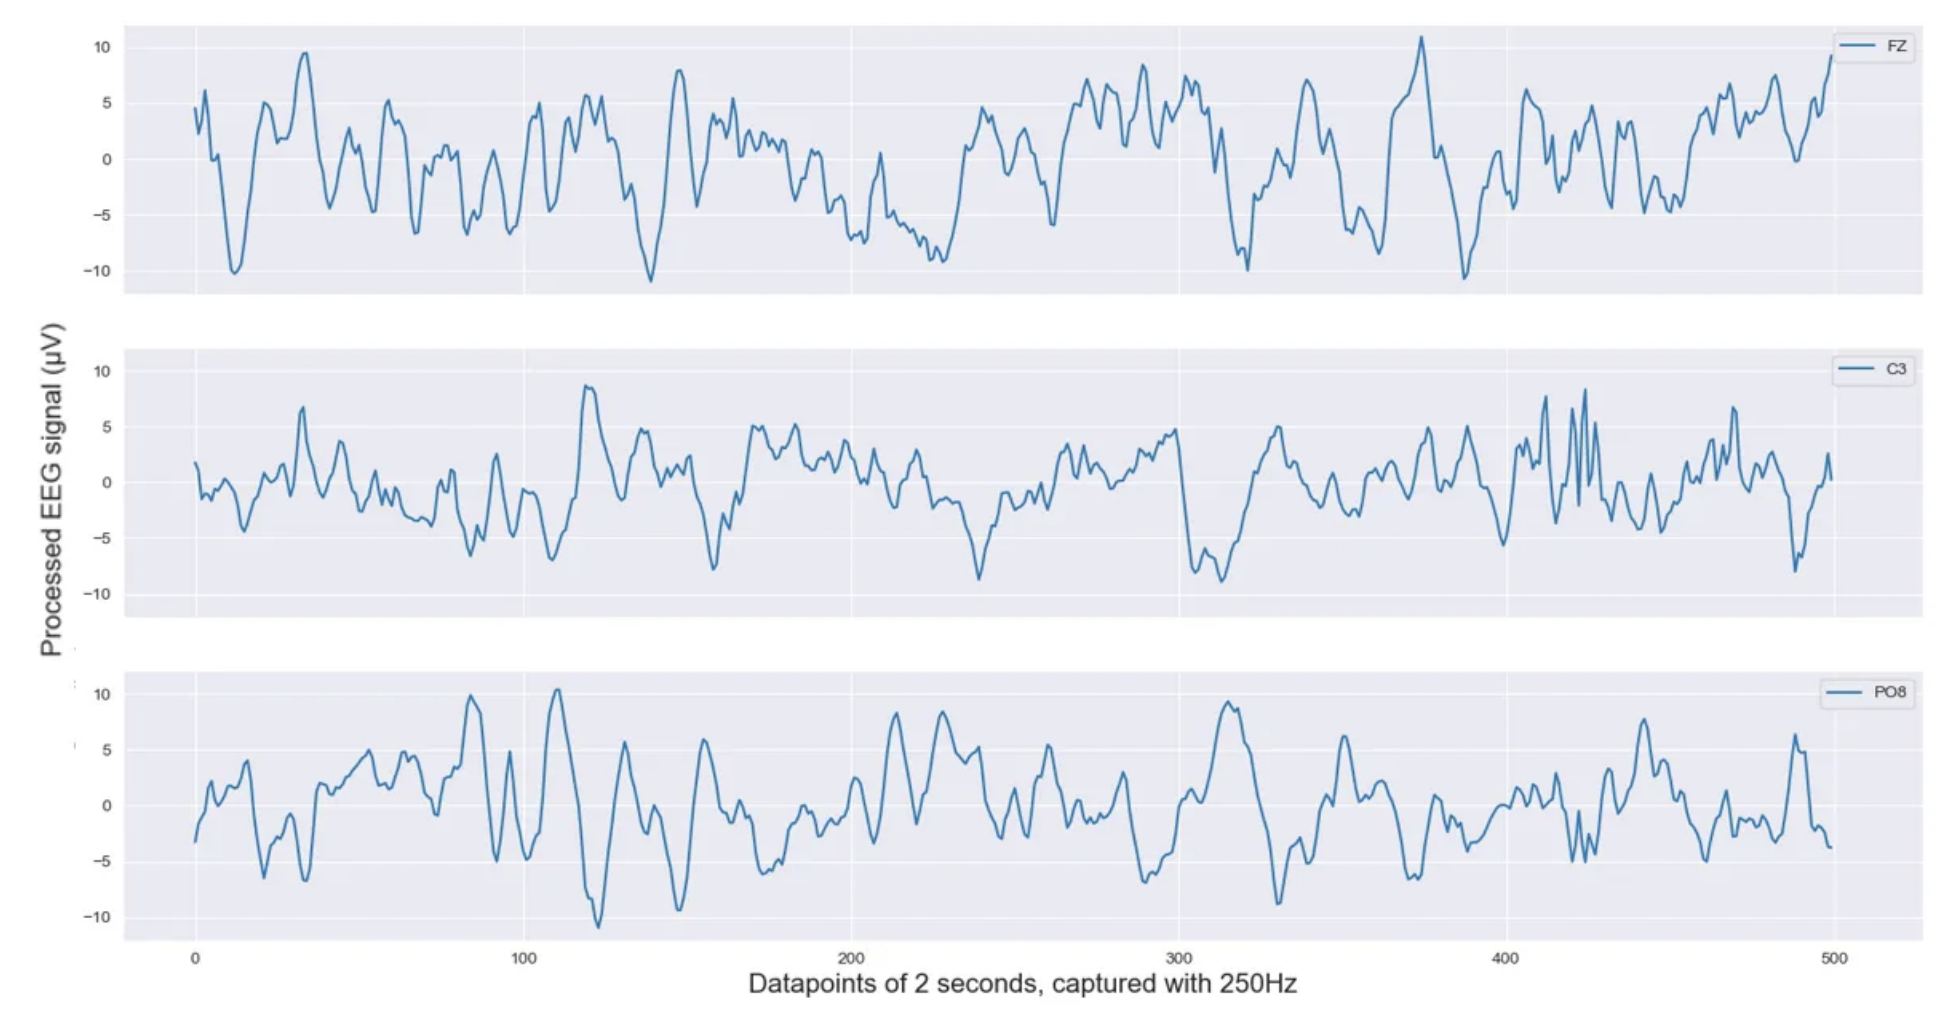

# Objetivo


O projeto utilizado como base neste trabalho é intitulado *Brain Invaders Adaptive versus Non-Adaptive P300 Brain-Computer Interface dataset*. O dataset é constituído por gravações de EEG feitas em 24 indivíduos que participaram de um experimento utilizando um sistema de interface cérebro-máquina com base na leitura de sinais do tipo P300. Para a captura dos sinais, 16 eletrodos foram posicionados, de acordo com o sistema 10-20, no escalpo dos voluntários. A figura abaixo demonstra os eletrodos utilizados (Vaineau et al., 2019):

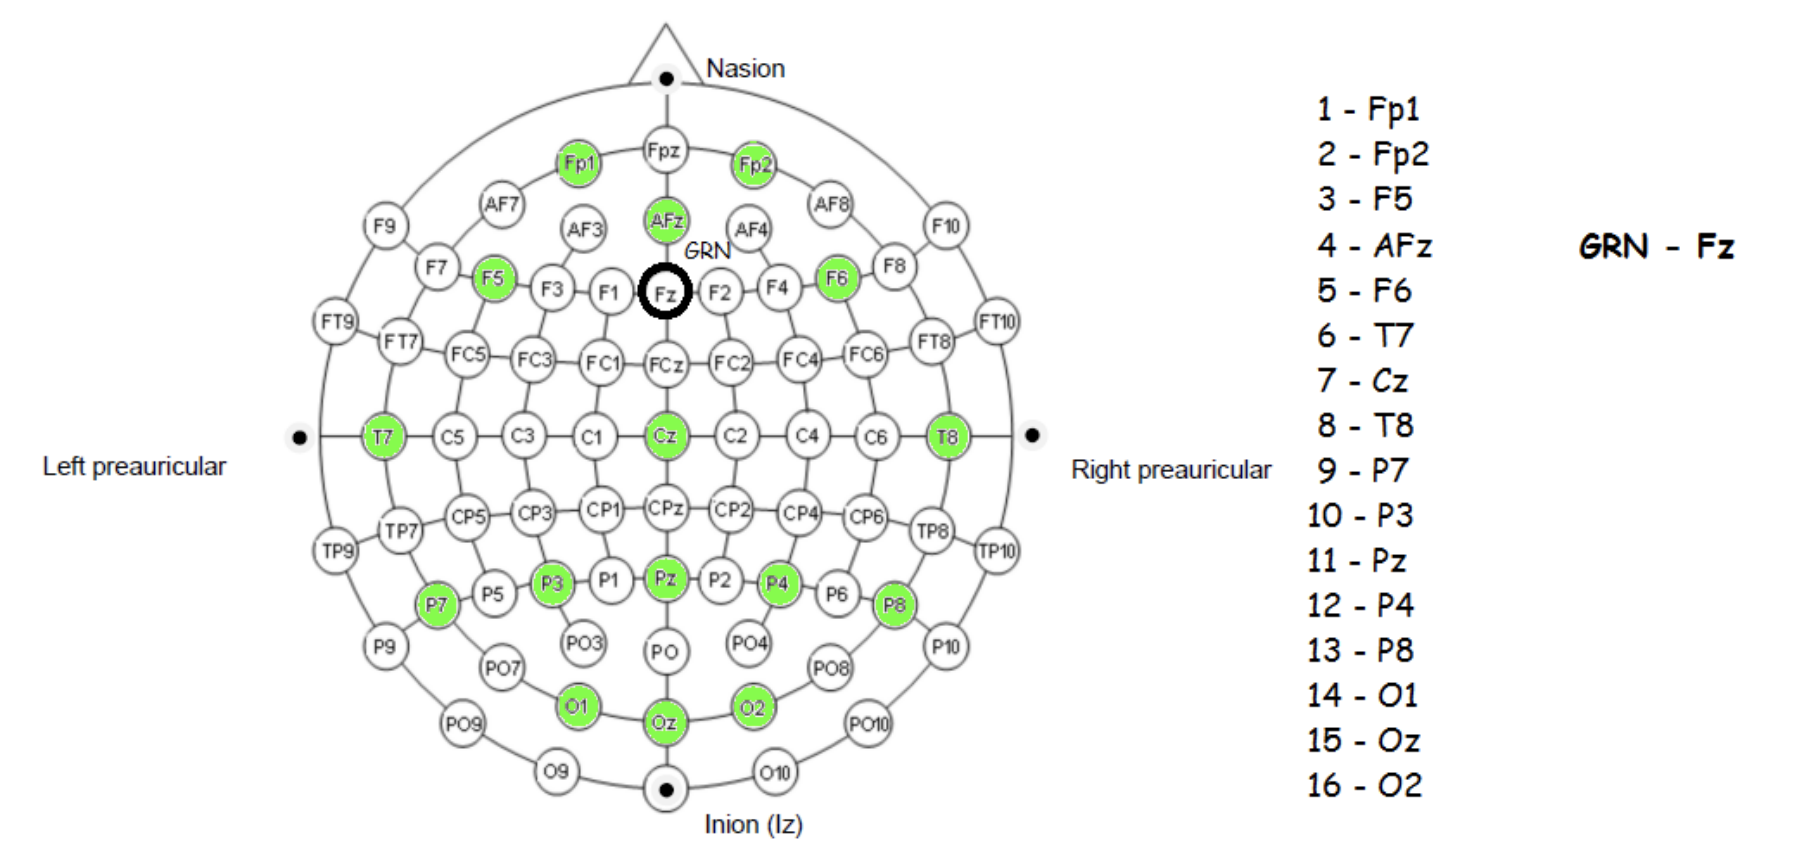

Como fonte de estímulo, um jogo chamado *Brain Invaders* foi utilizado no experimento. O objetivo deste jogo é destruir um alienígena em específico, apenas concentrando o pensamento nele (Congedo et al., 2011).

A interface do jogo é constituída por 36 símbolos distribuídos em 12 grupos. Como protocolo para captura dos eventos visuais, o método de repetição baseou-se em 12 flashes (um para cada grupo), que incluíam um símbolo alvo (*target flash* - alienígena a ser destruido) e 10 não-alvo (*non-target flash*). A figura abaixo demonstra a interface no momento em que estão iluminados 6 símbolos não-alvo (em branco) e um símbolo alvo (em vermelho) (Vaineau et al., 2019):

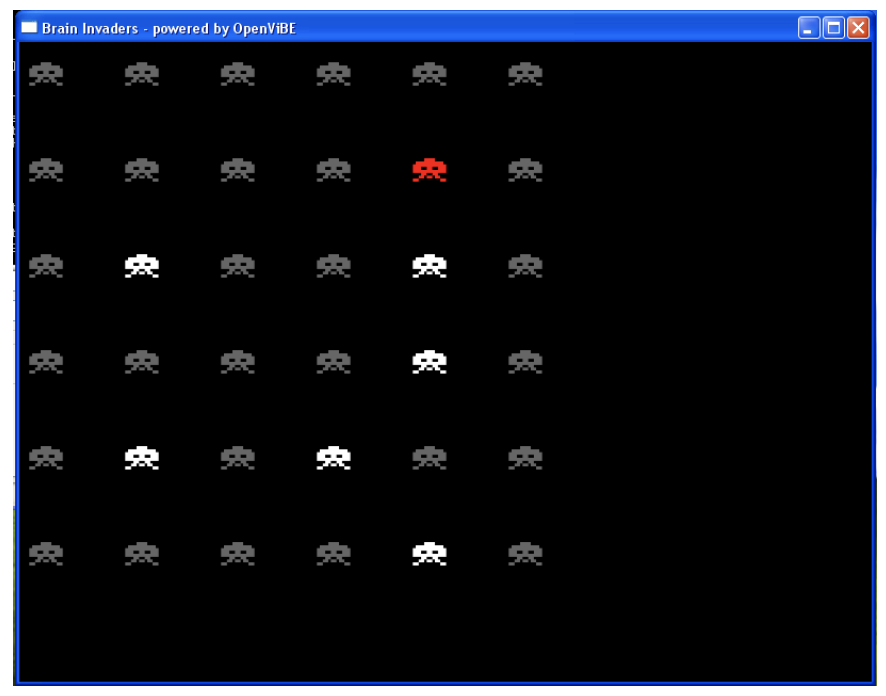

O objetivo deste trabalho é identificar se os sinais emitidos pelos voluntários do experimento são ou não referentes ao *target*, ou seja, se são do tipo P300.

# Dataset

Para cada voluntário, um arquivo zip contendo as gravações do experimento foi fornecido. Neste arquivo cada sessão é representada por uma pasta, na qual estão dispostos os arquivos de cada rodada respectiva da sessão.

Neste experimento, foram conduzidos dois testes:

1. **Não adaptativo:** neste modo clássico os dados de treinamento offline foram utilizados para calibrar o classificador na fase online
2. **Adaptativo:** neste modo, os dados da fase de treinamento não foram utilizados na fase online, sendo que o classificador foi iniciado com valores provenientes da média de outros participantes do experimento e foram continuamente adaptados usando os dados do voluntário corrente

Para este trabalho, iremos considerar apenas os dados referentes aos testes não adaptativos para facilitar o entendimento do experimento realizado.

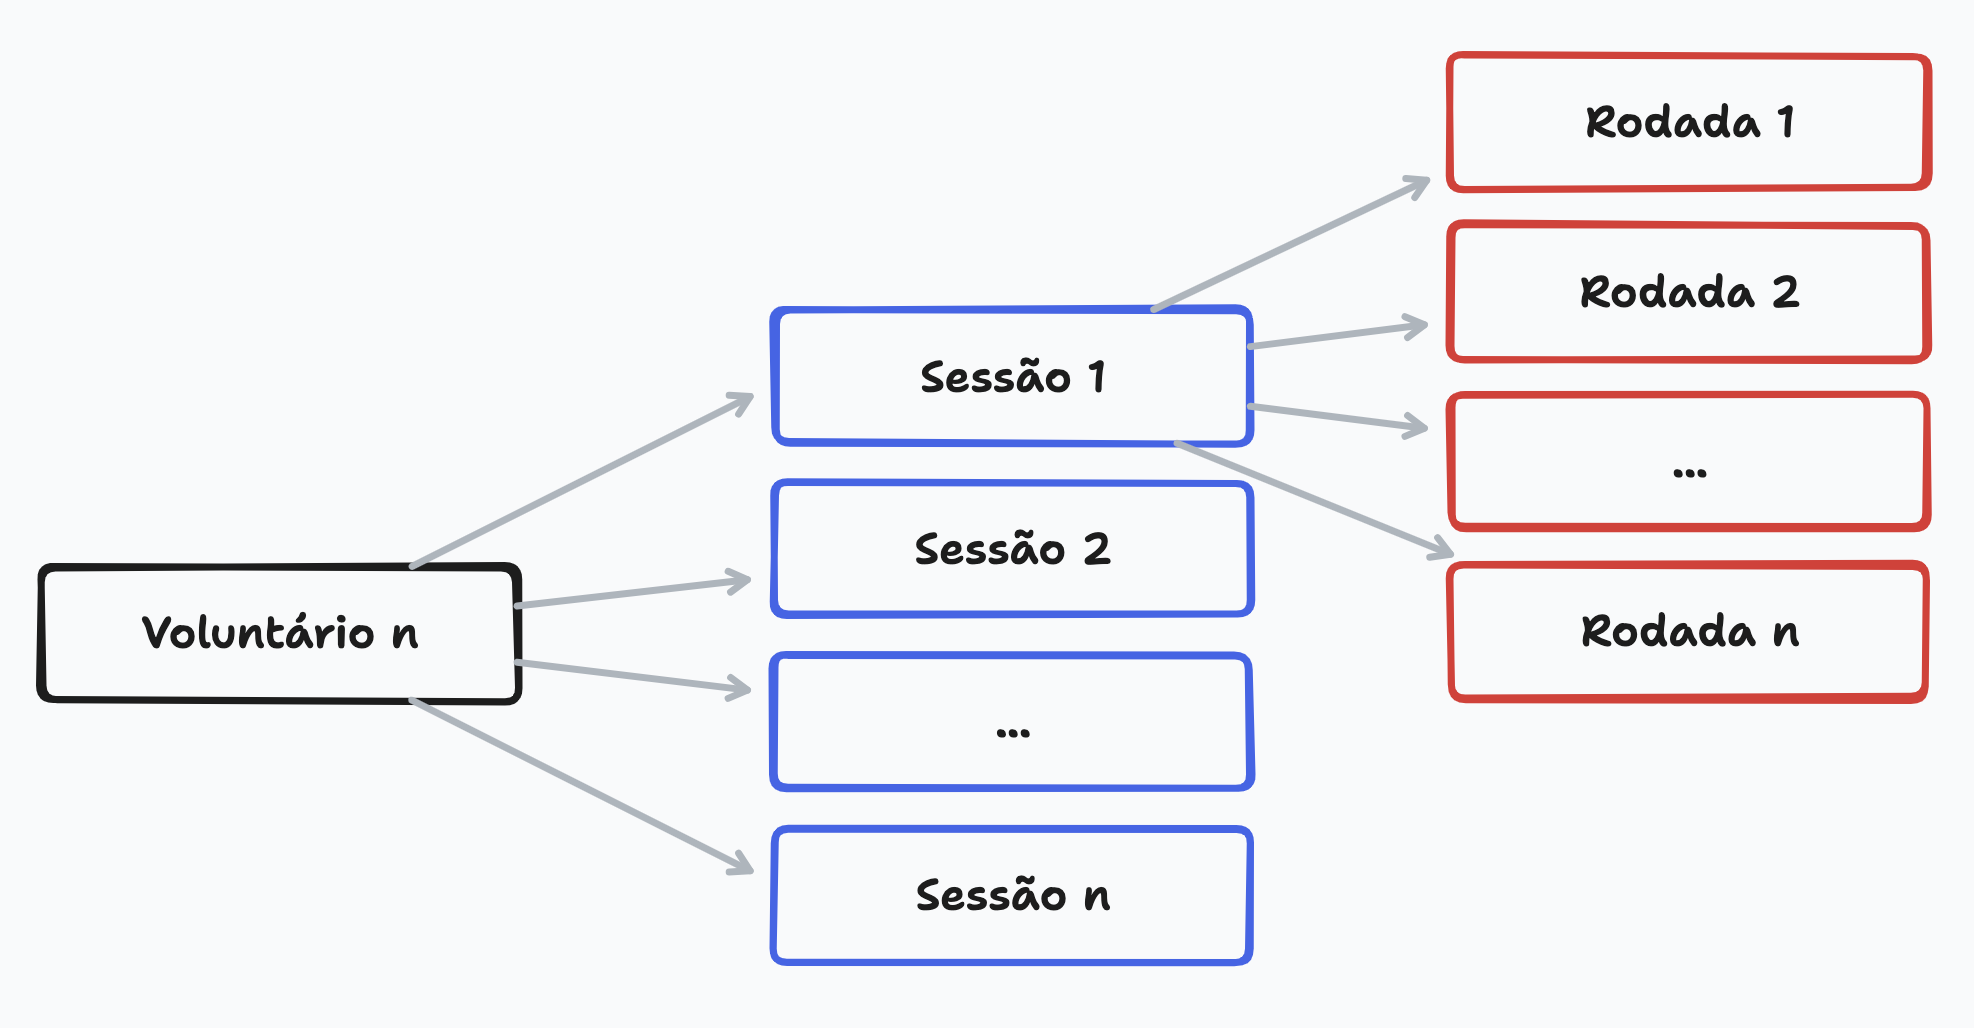

# Análise exploratória

In [ ]:
# Instalação das dependências
!pip install numpy
!pip install moabb
!pip install autoreject
!pip install mne
!pip install matplotlib
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.0/365.0 kB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyriemann: filename=pyriemann-0.3-py2.py3-none-any.whl size=78031 sha256=c1335e7ef0d0042c4a96d7a271a5fcedfa6efa35b92dd42ea90ce49fa0d29ffc
  Stored in directory: /root/.cache/pip/wheels/eb/52/63/ad042f5ca1209b213a326a843e75d730b30bc7a89a79edb187
Successfully built pyriemann


In [ ]:
import moabb # Importa os dados referentes ao experimento
import warnings
import matplotlib.pyplot as plt
import mne
import numpy as np
from autoreject import get_rejection_threshold
%matplotlib inline

warnings.filterwarnings("ignore")

Tensorflow not install, you could not use those pipelines
To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


In [ ]:
sampling_rate = 512 # Captura dos dados em 512 Hz (512 amostras por segundo)

dataset = moabb.datasets.bi2013a(
    NonAdaptive=True, # Apenas dados clássicos (treinados sem calibração automática)
    Adaptive=False,
    Training=True, # Apenas dados de treinamento
    Online=False,
)

data = []
for i in range(1, 3): # Iterando em 2 voluntários
    voluntary_data = dataset._get_single_subject_data(i)
    data.append(voluntary_data)

# O vetor 'data' agora contém as sessões dos voluntários
data

MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


100%|████████████████████████████████████████| 265M/265M [00:00<00:00, 148GB/s]
SHA256 hash of downloaded file: 8c0c9cb3e3345247430d5945e91c645bffa4074f79a196ac911aefde67a0acc1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 244M/244M [00:00<00:00, 70.4GB/s]
SHA256 hash of downloaded file: 25538b1956e0ac212a60fefaea9187171de19934637d72025120ddd45f363907
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 136M/136M [00:00<00:00, 22.5GB/s]
SHA256 hash of downloaded file: e71a1511ad839b7c93aab9f5dc2134a90e6d5a2a4d2546febcc11a6c9c1b856f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████

[{'session_6': {'run_3': <RawArray | 17 x 130528 (254.9 s), ~17.0 MB, data loaded>},
  'session_3': {'run_3': <RawArray | 17 x 133024 (259.8 s), ~17.3 MB, data loaded>},
  'session_5': {'run_3': <RawArray | 17 x 129184 (252.3 s), ~16.8 MB, data loaded>},
  'session_1': {'run_3': <RawArray | 17 x 139552 (272.6 s), ~18.1 MB, data loaded>},
  'session_7': {'run_3': <RawArray | 17 x 128864 (251.7 s), ~16.7 MB, data loaded>},
  'session_4': {'run_3': <RawArray | 17 x 133344 (260.4 s), ~17.3 MB, data loaded>},
  'session_8': {'run_3': <RawArray | 17 x 132064 (257.9 s), ~17.2 MB, data loaded>},
  'session_2': {'run_3': <RawArray | 17 x 138784 (271.1 s), ~18.0 MB, data loaded>}},
 {'session_6': {'run_3': <RawArray | 17 x 139648 (272.7 s), ~18.1 MB, data loaded>},
  'session_3': {'run_3': <RawArray | 17 x 132480 (258.7 s), ~17.2 MB, data loaded>},
  'session_5': {'run_3': <RawArray | 17 x 136544 (266.7 s), ~17.7 MB, data loaded>},
  'session_1': {'run_3': <RawArray | 17 x 239200 (467.2 s), ~31.

In [ ]:
# Explorando os dados de uma rodada (primeiro voluntário, rodada 3)
data_run_1_3 = data[0]['session_1']['run_3']
data_run_1_3

<RawArray | 17 x 139552 (272.6 s), ~18.1 MB, data loaded>

Os dados provenientes do experimento estão no formato RAW da biblioteca MNE, especializada na leitura de EEG. Como visto acima, esse formato fornece algumas informações importantes, como o número de eletrodos (16), taxa de amostragem (512hz) e a duração (04 min e 33 seg). A seguir, iremos continuar a explorar uma das rodadas para entender os dados.

In [ ]:
print(f'Formato dos dados: {data_run_1_3.get_data().shape[0]} canais; {data_run_1_3.get_data().shape[1]} pontos temporais')
print(f'Canais do EEG: {data_run_1_3.ch_names}')

Formato dos dados: 17 canais; 139552 pontos temporais
Canais do EEG: ['Fp1', 'Fp2', 'F5', 'AFz', 'F6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'STI 014']


Using matplotlib as 2D backend.


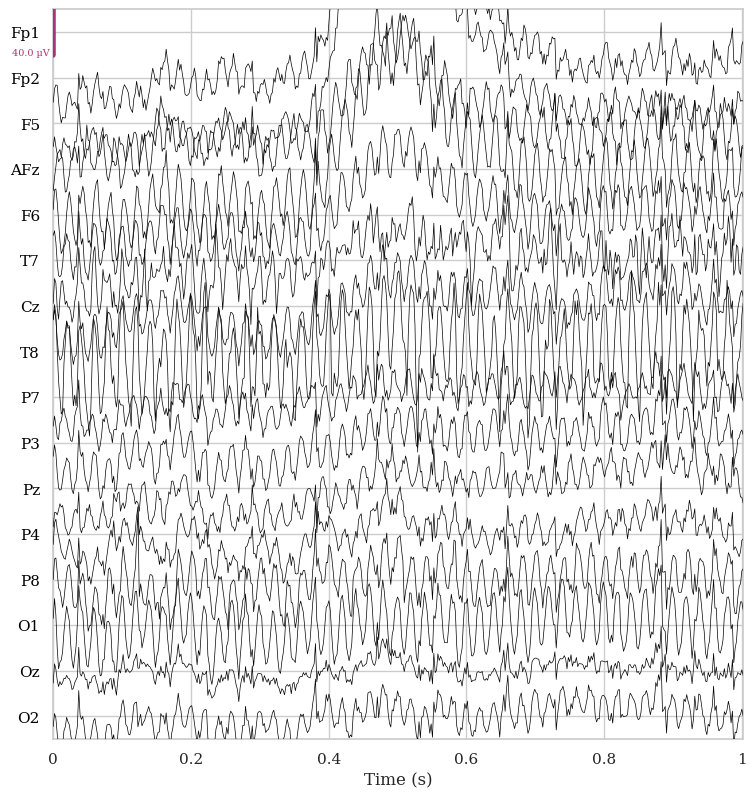

In [ ]:
# Vamos ver os dados apenas do primeiro segundo da rodada
data_run_1_3.plot(start=0, duration=1, n_channels=16, clipping=None, show_scrollbars=False);

Acima temos os dados do primeiro segundo da rodada 3 do voluntário 1. Podemos perceber os potenciais elétricos dos 16 canais uitlizados no experimento no domínio do tempo.

# Pré-processamento

## Domínio da frequência


Vamos agora analisar agora alguns pontos importantes sobre os dados, como a distribuição da frequência.
O gráfico de *Power Spectral Density (PSD)* refere-se à amplitude das ondas senoidais no domínio da frequência. Funciona de forma semelhante a um histograma, indicando a quantidade de energia presente em cada compartimento de frequência.

Effective window size : 4.000 (s)


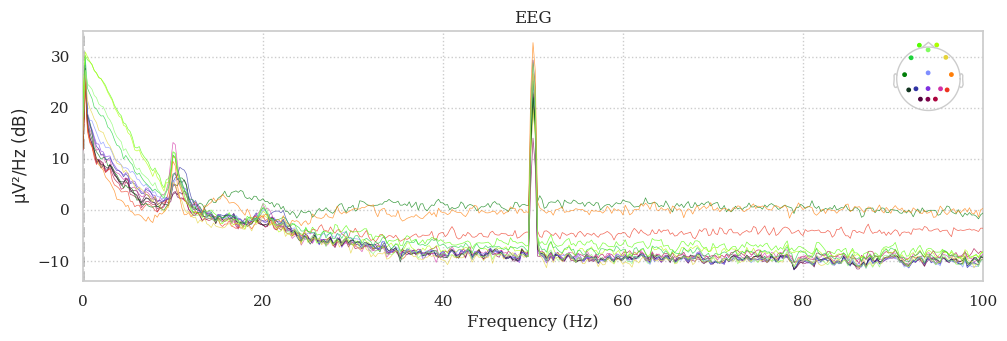

In [ ]:
data_run_1_3.compute_psd(fmax=100).plot();

É possível perceber pelo gráfico acima que há uma interferência no sinal por volta de 50Hz. Além disso, é perceptível que as frequências com as maiores potências estão entre 0Hz e 20Hz (faixa das ondas *delta, theta, alpha e beta*)

De acordo com Dallmer-Zerbe et al. (2020), o sinal P300 está presente nas ondas cerebrais delta (0-4Hz) e theta (4-8Hz). Dessa forma, podemos cortar todas as frequências maiores que 8Hz.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 16897 samples (33.002 s)

Effective window size : 4.000 (s)


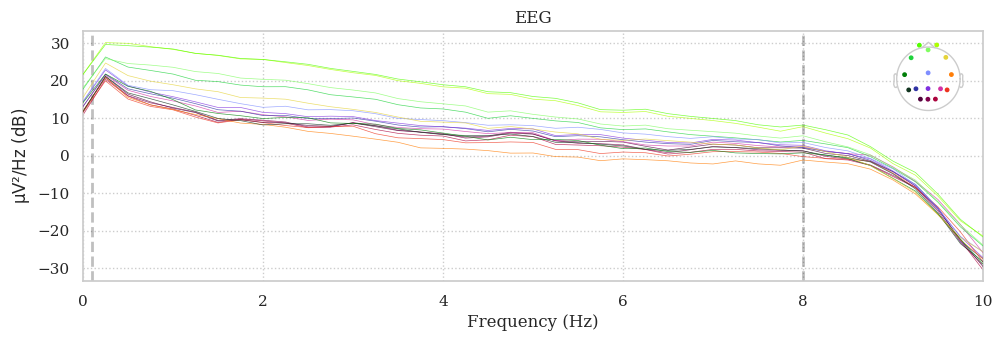

In [ ]:
# Configuração da faixa de frequência de interesse
low_cut = 0.1
hi_cut  = 8

filtered_data_run_1_3 = data_run_1_3.copy().filter(low_cut, hi_cut)
filtered_data_run_1_3.compute_psd(fmax=10).plot();

Agora, vamos comparar os dados do EEG originais e os filtrados:

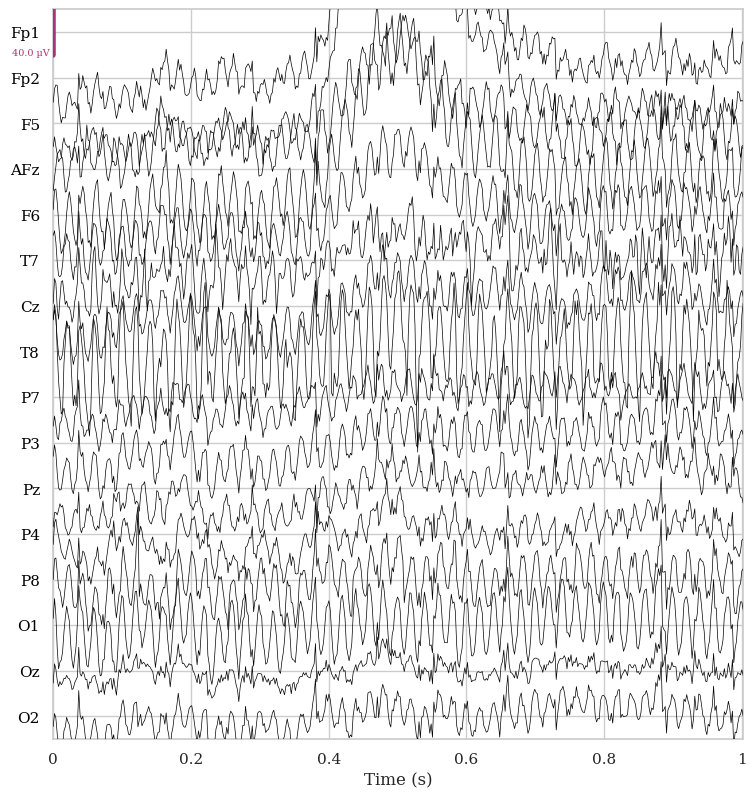

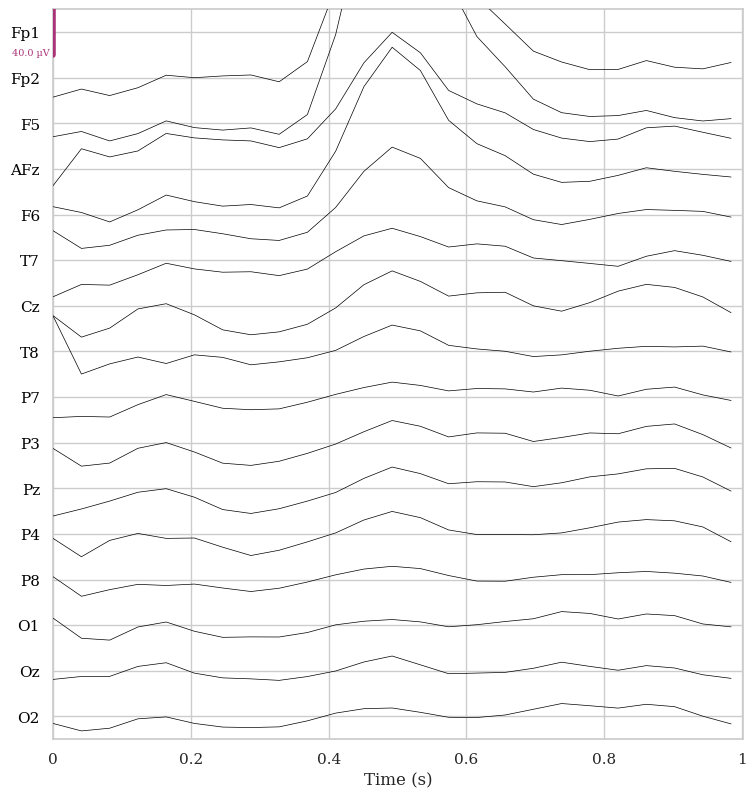

In [ ]:
data_run_1_3.plot(start=0, duration=1, n_channels=16, clipping=None, show_scrollbars=False);
filtered_data_run_1_3.plot(start=0, duration=1, n_channels=16, clipping=None, show_scrollbars=False);

## Artefatos

Como é possível observar acima, os dados de EEG ficaram mais limpos após filtrar frequências indesejadas.

Agora precisamos remover os artefados embutidos nos sinais. Estes artefatos nada mais são do que ruídos no sinal gerados por diversos motivos: o piscar ou movimento dos olhos, contrações de músculos, entre outros. Cada um desses ruídos possui características muito específicas no domínio do tempo e da frequência.

- **Piscar dos olhos**: comumente encontrado nos eletrodos mais perto dos olhos, como Fp1 e Fp2. O potencial elétrico apresenta picos que crescem e diminuem rapidamente por cerca de 250-300ms. Nestes casos, também é possível observar um potencial oposto nos eletrodos posteriores, como TP9 e TP10.

- **Movimento dos olhos**: os neurônios da retina estão organizados em um dipolo (uma fonte com polos positivos e negativos), que é justamente o tipo de sinal que o EEG captura. Se a posição dos olhos não mudar durante o experimento, não haverá artefatos neste sentido, porém, se os olhos se moverem, o dipolo também se move e registra esta mudança no EEG. Quando os olhos se movem para a direita ou esquerda, o efeito detectado no EEG é que o potencial elétrico irá aumentar nos eletrodos frontais em um dos lados da cabeça e diminuir no outro lado.

- **Contrações musculares**: um aumento repentino da frequência é uma típica consequência de uma contração muscular. Quando ocorre nos eletrodos frontais ou posteriores é um sinal de movimento do rosto e/ou face. Este tipo de artefato tipicamente está presente na faixa entre 20-40Hz.

Vamos analisar agora o EEG em busca de artefatos. Um novo gráfico será gerado com uma escala maior, para podermos identificar melhor os picos de potencial elétrico.

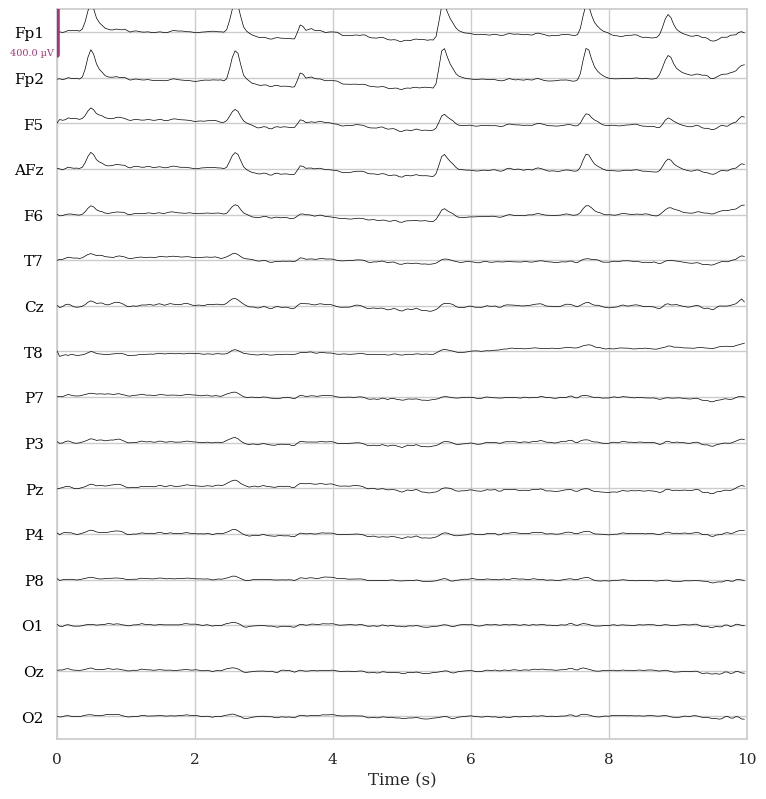

In [ ]:
filtered_data_run_1_3.plot(n_channels=16, clipping=None, show_scrollbars=False, scalings=dict(eeg=20e-5));

Como é possível ver acima, há alguns picos de potencial nos eletrodos Fp1 e Fp2, o que provavelmente indica os momentos que o voluntário piscou os olhos.

Para remover estes ruídos podemos usar o ICA (Independent Component Analysis), que é capaz de separar o EEG dos artefatos, pois, através do tempo e da localização dos eletrodos, cada sinal possui uma fonte que tem diferentes propriedades espaço-temporais.

In [ ]:
# Filtro para aplicar o ICA
ica_low_cut = 1.0
hi_cut  = 8

raw_ica_1_3 = data_run_1_3.copy().filter(ica_low_cut, hi_cut)

# Separando em epochs de 1 segundo cada
tstep = 1.0
events_ica = mne.make_fixed_length_events(raw_ica_1_3, duration=tstep)
epochs_ica_1_3 = mne.Epochs(raw_ica_1_3, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

# Iremos rodar a função autoreject, que identifica o limiar para encontrar sessões de dados com ruídos extremos
# Assim, diminuímos a variância dos dados para o ICA desempenhar melhor
reject = get_rejection_threshold(epochs_ica_1_3);
reject

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 1691 samples (3.303 s)

Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 272 events and 513 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg


{'eeg': 0.0001378823586570204}

Para executar o ICA, precisamos indicar quantos componentes queremos utilizar. Por padrão, o ICA irá computar tantos componentes quanto o número de canais disponíveis nos dados, o que comumente não é o desejado.

O parâmetro *n_components* do ICA pode ser especificado passando um número inteiro com o número de componentes desejado (o que é difícil saber de antemão), ou um percentual que represente a quantidade de dados que deve ser explicado pelos componentes. Tipocamente, um bom valor a ser usado é 99%.


In [ ]:
# Parâmetros do ICA
random_state = 42
ica_n_components = .99

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state)
ica.fit(epochs_ica_1_3,
        reject=reject,
        tstep=tstep)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by explained variance: 6 components
Fitting ICA took 1.1s.


<ICA | epochs decomposition, method: fastica (fit in 12 iterations on 139536 samples), 6 ICA components (16 PCA components available), channel types: eeg, no sources marked for exclusion>

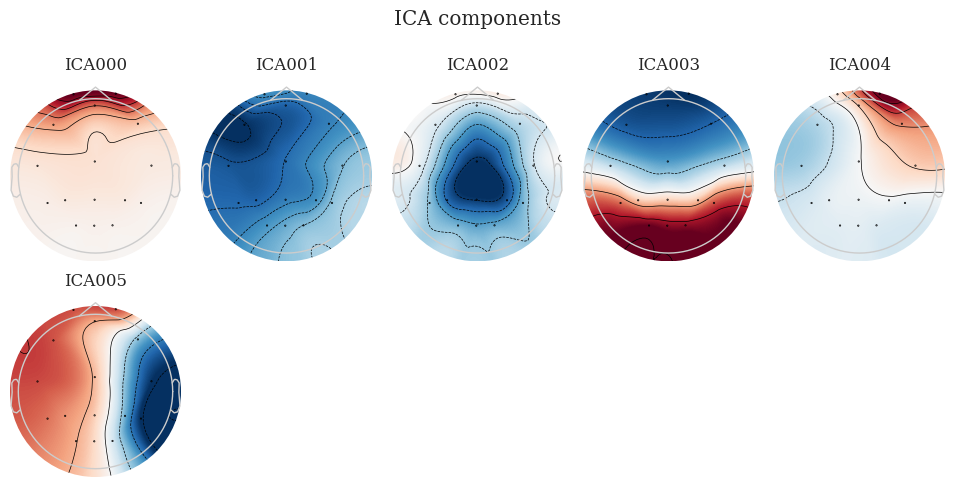

In [ ]:
ica.plot_components();

Os mapas topográficos do escalpo visualizados acima mostram cada um dos componentes gerados pelo ICA, onde a cor vermelha indica um potencial positivo, azul negativo e branco zero.

Visualizando os componentes gerados, podemos identificar alguns pontos de interesse:
- O componente **ICA000** provavelmente indica artefatos oriundos do piscar de olhos, pois estão próximos aos eletrodos Fp1 e Fp2
- O componente **ICA004** provavelmente indica um movimento horizontal dos olhos, pois há diferença de potencial elétrico entre os lados do escalpo próximos aos eletrodos Fp1 e Fp2

Abaixo iremos usar o método *plot_properties* para ver mais detalhes dos componentes. Ruídos tipicamente se manifestam com alta variância através das épocas. Atividade cerebral verdadeira tipicamente aparece como consistentemente similar e com pouca variância entre as épocas.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated


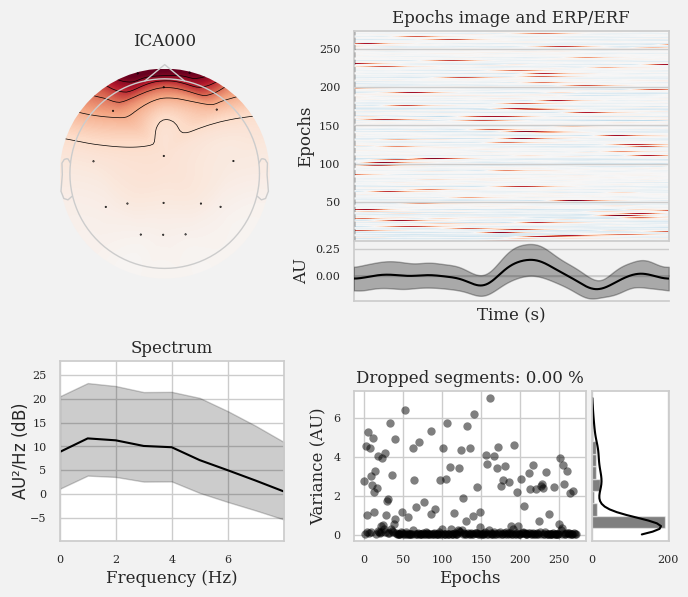

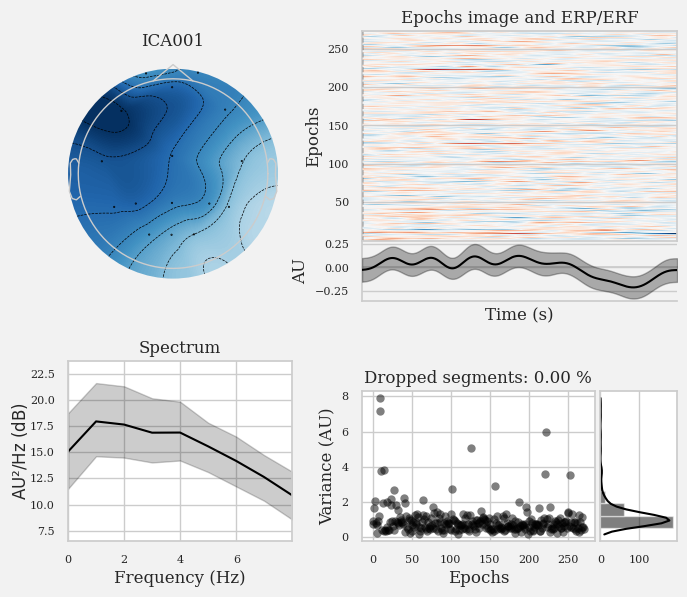

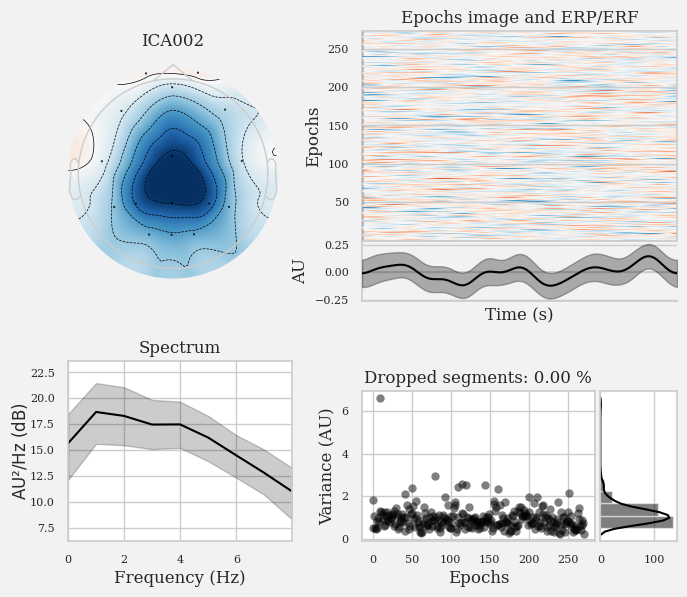

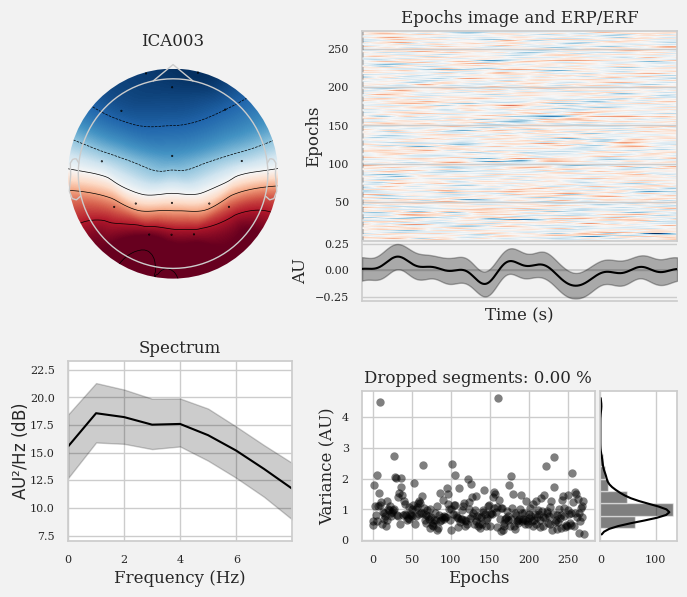

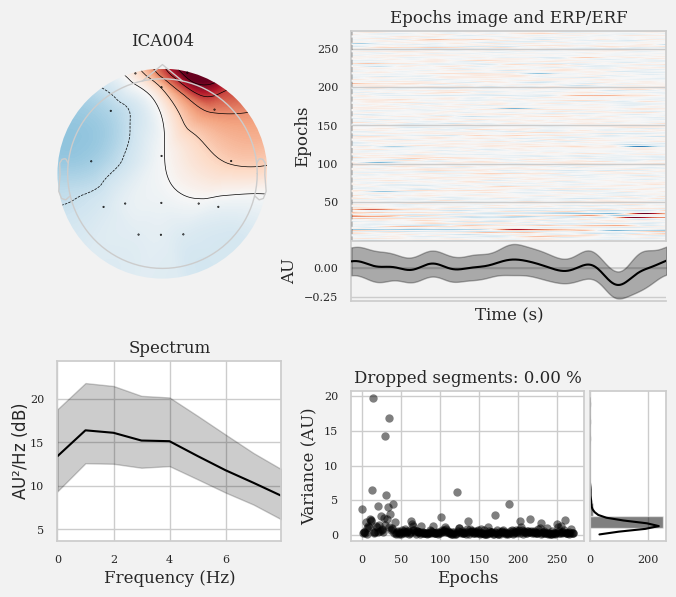

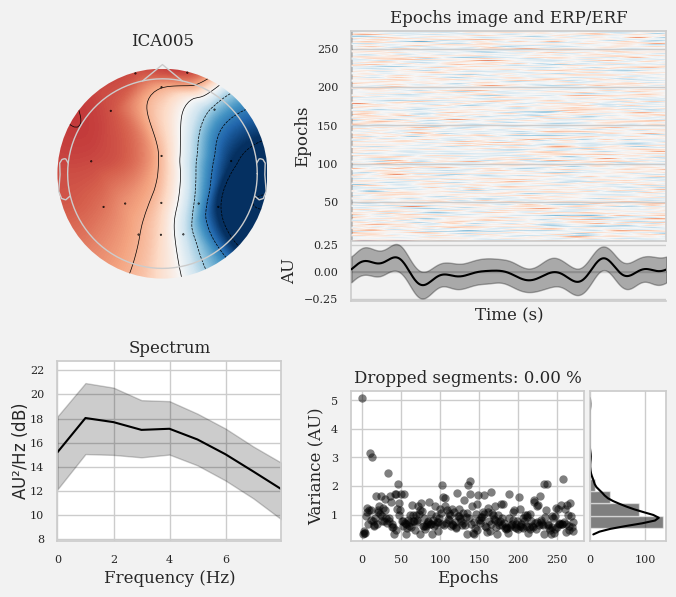

In [ ]:
ica.plot_properties(epochs_ica_1_3, picks=range(0, ica.n_components_), psd_args={'fmax': hi_cut});

Vendo os gráficos de variância acima, de fato podemos identificar que os componentes ICA000 e ICA004 representam artefatos, pois apresentam alta variabilidade de potencial elétrico entre as épocas.

Agora precisamos remover estes componentes indesejados.

Using EOG channels: Fp1, F6
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 H

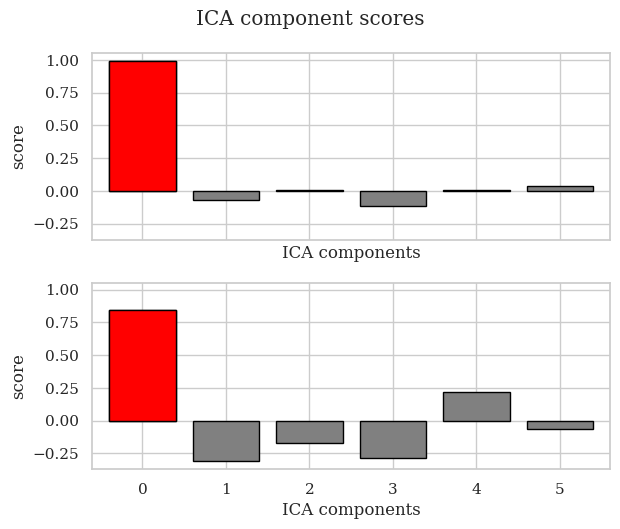

In [ ]:
ica_z_thresh = 1.96
eog_indices, eog_scores = ica.find_bads_eog(raw_ica_1_3,
                                            ch_name=['Fp1', 'F6'],
                                            threshold=ica_z_thresh)
ica.exclude = eog_indices

ica.plot_scores(eog_scores);

Agora que excluímos os componentes indesejados, temos um modelo de ICA treinado nos dados do voluntário 1. Esse modelo será aplicado posteriormente, antes da aplicação do algoritmo de classificação.

# Eventos

Agora que temos um melhor entendimento sobre os dados, precisamos identificar os eventos de interesse. Neste caso, devemos procurar por sinais do tipo P300.

O dataset do EEG contém um conjunto de dados relacionados aos eventos coletados no experimento. Para visualizar estes dados, vamos usar a função *find_events* do MNE e plotar os pontos de eventos no domínio do tempo.

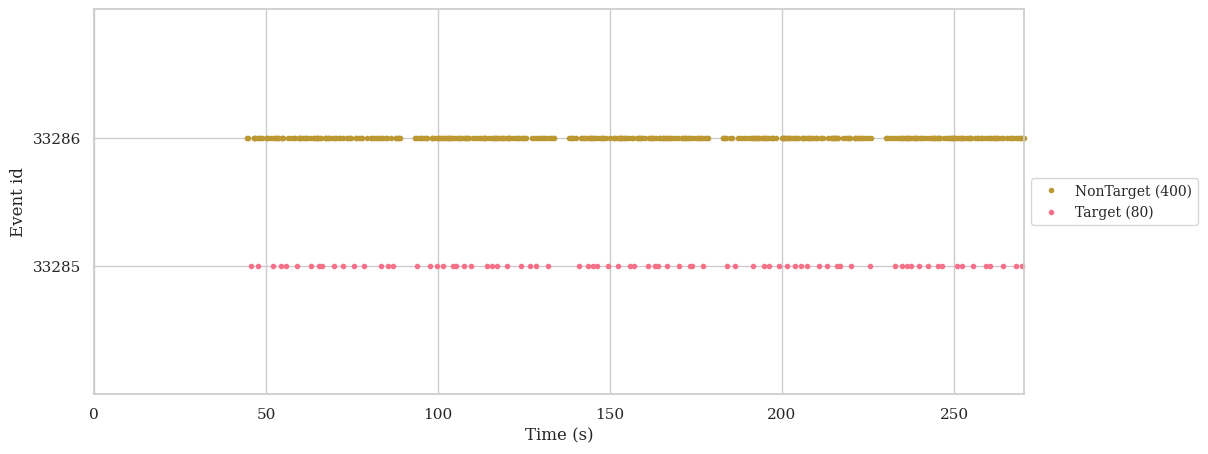

In [ ]:
events = mne.find_events(raw=data_run_1_3, shortest_event=1, verbose=False)
events[:10]

# O ID 33286 identifica não-alvos e 33285 identifica alvos (alienígena a ser destruído)
event_id = {'NonTarget': 33286, 'Target': 33285}

fig, ax = plt.subplots(figsize=[15, 5])
mne.viz.plot_events(events, data_run_1_3.info['sfreq'],
                    event_id=event_id,
                    axes=ax)
plt.show()

Agora temos que dividir os dados em epochs (janelas de tempo) sincronizadas temporalmente com os eventos de interesse (target e non-target). Para fazer isso, usamos o método *Epochs* do MNE, que cria um objeto da classe Epochs.

Alguns argumentos são necessários, entre eles:
- Os dados filtrados
- Array de eventos e respectivo dicionário descritivo
- Janela de tempo da epoch, relativa ao evento. Tipicamente, o tmin (valor mínimo) é um número negativo, pois precisamos de um período base para comparar a atividade do evento de interesse que ocorre depois do label do evento (geralmente, para o P300, cerca de 300ms, variando para mais ou para menos). O tempo de parada (tmax) depende do tempo do componente de ERP (event-related potential) desejado. Para nosso caso, podemos considerar por volta de 600ms para identificar o sinal P300.

In [ ]:
# Configurações da epoch
tmin = -.100  # Início de cada epoch (em segundos)
tmax = 0.6  # Fim de cada epoch (em segundos)
baseline = (None, 0)

# Criação das epochs
epochs = mne.Epochs(filtered_data_run_1_3,
                    events, event_id,
                    tmin, tmax,
                    baseline=baseline,
                    preload=True
                   )
epochs

Not setting metadata
480 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 480 events and 359 original time points ...
0 bad epochs dropped


<Epochs |  480 events (all good), -0.0996094 – 0.599609 s, baseline -0.0996094 – 0 s, ~22.4 MB, data loaded,
 'NonTarget': 400
 'Target': 80>

Antes de corrigirmos os artefatos usando o modelo de ICA criado, vamos visualizar a média das épocas por eletrodo e também um mapa de calor.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


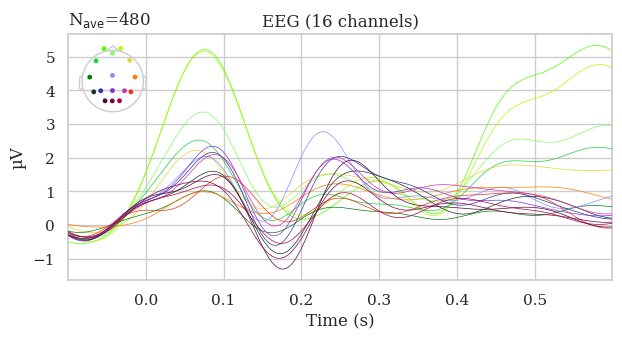

In [ ]:
epochs.average().plot(spatial_colors=True);

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


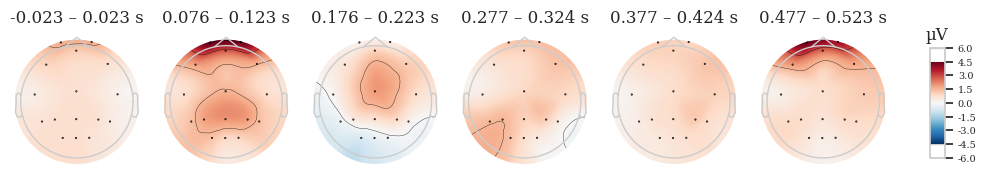

In [ ]:
times = np.arange(0, tmax, 0.1)
epochs.average().plot_topomap(times=times, average=0.050);

Visualizando acima, podemos perceber que no intervalo entre 0.076 e 0.123 segundos e entre 0.477 e 0.523, há artefatos de piscar de olhos. Isso também é evidenciado no gráfico anterior, onde os eletrodos Fp1 e Fp2 possuem alto potencial elétrico (curvas verdes).

Vamos agora aplicar o modelo de ICA criado às épocas para removermos os artefatos. Depois, vamos verificar novamente os gráficos para identificar as mudanças.

In [ ]:
epochs_postica = ica.apply(epochs.copy())

Applying ICA to Epochs instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


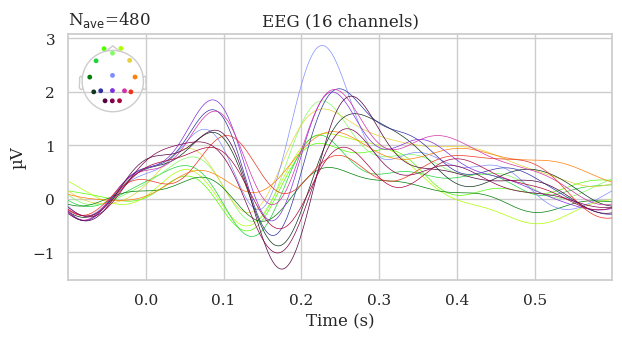

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


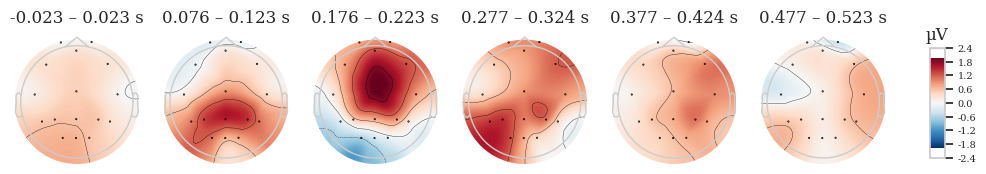

In [ ]:
epochs_postica.average().plot(spatial_colors=True);
epochs_postica.average().plot_topomap(times=times, average=0.050);

Podemos perceber que, após a aplicação do ICA, os artefatos não estão mais presentes no mapa de calor.

Vamos agora visualizar o mapa de calor em conjunto com um gráfico que indica o potencial elétrico isolado de cada canal, separados em Target e Non-Target.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


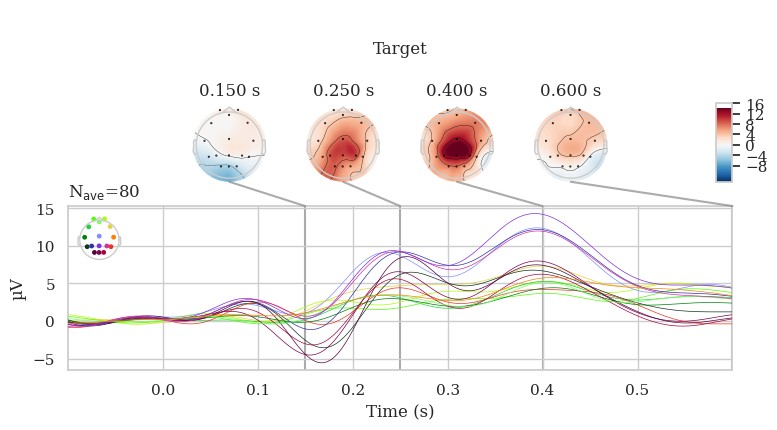

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


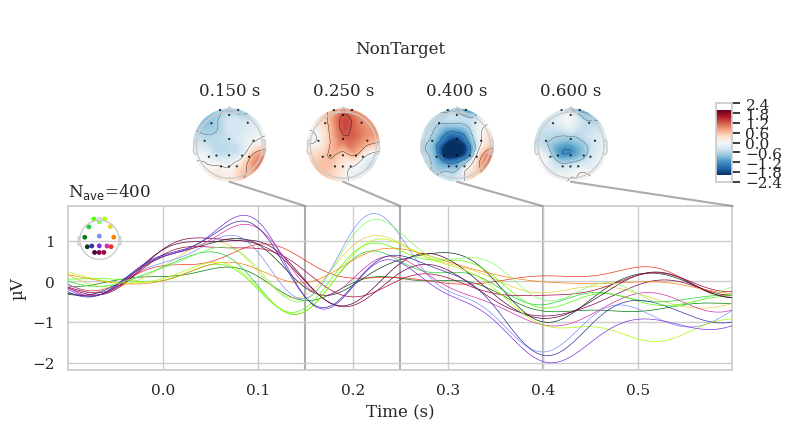

In [ ]:
conditions = ['Target', 'NonTarget']
evokeds = {c:epochs_postica[c].average() for c in conditions} # Separação dos ERPs
times = [.150, .250, .400, .600] # Intervalos de tempo a serem analisados

for c in evokeds.keys():
    evokeds[c].plot_joint(times=times, title=c);

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


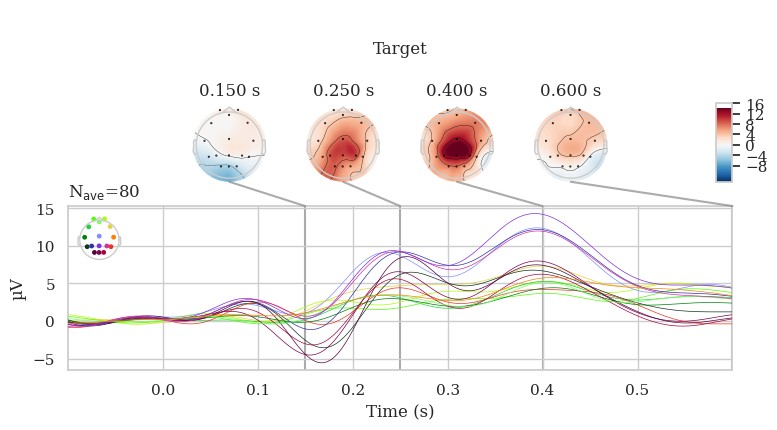

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


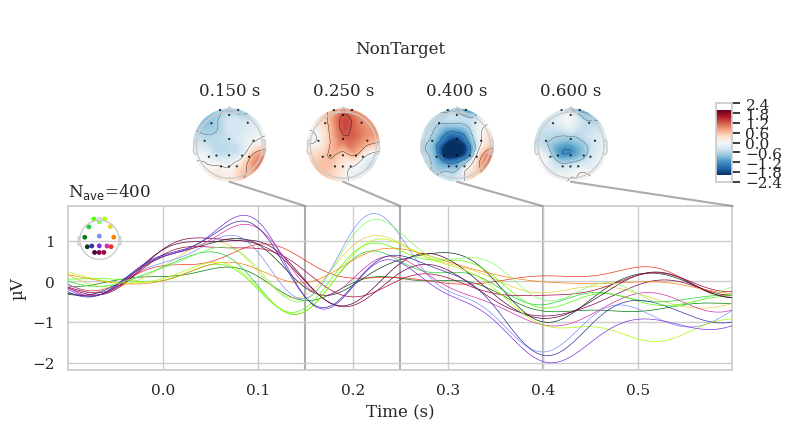

In [ ]:
times = [.150, .250, .400, .600]
for c in evokeds.keys():
    evokeds[c].plot_joint(times=times, title=c);

É possível ver as diferenças entre os sinais dos eventos Target e NonTarget. Destaca-se que no Target, há um pico de amplitude por volta de 400ms, principalmente nos eletrodos localizados na área centro-parietal e occipital do escalpo, o que é um forte indicativo do P300.

Já no NonTarget, podemos perceber momentos diferentes de picos para diferentes eletrodos, o que indica a falta do sinal P300.

Vamos agora analisar especificamente os eletrodos Cz, Pz e Oz (plano sagital da linha média), que comumente são fortemente influenciados pelo sinal P300. Para isso, iremos encontrar a média destes potenciais elétricos em conjunto.

combining channels using "mean"
combining channels using "mean"


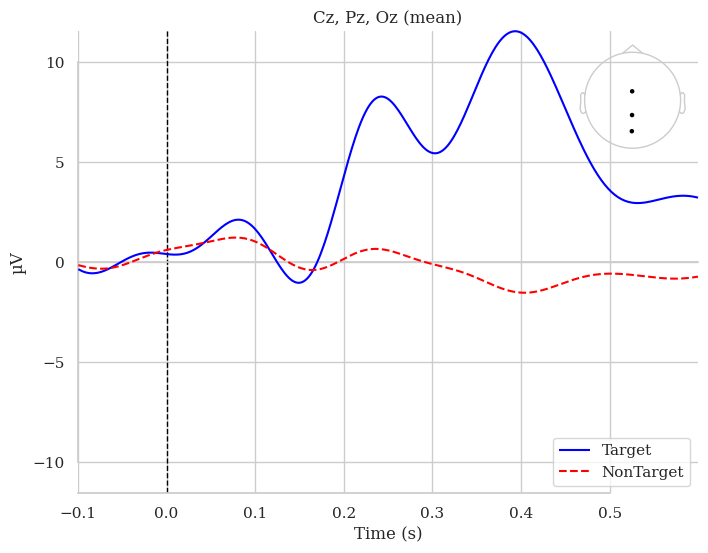

In [ ]:
roi = ['Cz', 'Pz', 'Oz']

color_dict = {'Target':'blue', 'NonTarget':'red'}
linestyle_dict = {'Target':'-', 'NonTarget':'--'}

mne.viz.plot_compare_evokeds(evokeds, combine='mean',
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict);

No gráfico acima, podemos ver claramente em azul a presença de um sinal P300, que atinge seu pico por volta de 400ms após o estímulo. Este formato de onda se correlaciona fortemente com o encontrado em estudos, como visto abaixo (Samima, Sarma e Samanta, 2017):

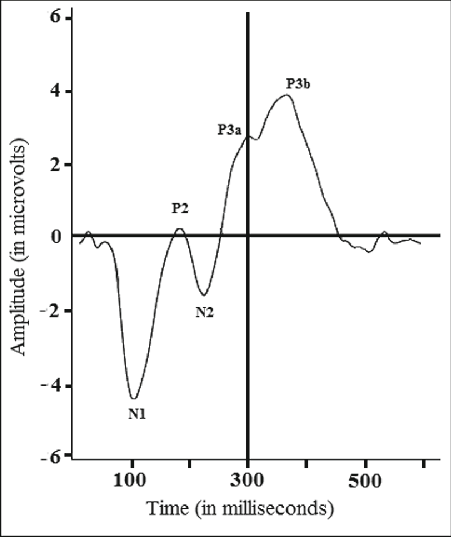

# Classificação

Para realizar a classificação do sinal em P300 ou não-P300, primeiro vamos criar um método que recebe como parâmetro o EEG e devolve as epochs e eventos pré-processados.

In [ ]:
def parse_eeg(raw):
    # Filtro de frequência
    low_cut = 0.1
    hi_cut  = 8
    filtered = raw.copy().filter(low_cut, hi_cut)

    # Filtro para aplicar o ICA
    ica_low_cut = 1.0
    ica_hi_cut  = 8
    raw_ica = raw.copy().filter(ica_low_cut, hi_cut)

    # Separando em epochs de 1 segundo cada
    tstep = 1.0
    events_ica = mne.make_fixed_length_events(raw_ica, duration=tstep)
    epochs_ica = mne.Epochs(raw_ica, events_ica,
                            tmin=0.0, tmax=tstep,
                            baseline=None,
                            preload=True)

    # Iremos rodar a função autoreject, que identifica o limiar para encontrar sessões de dados com ruídos extremos
    # Assim, diminuímos a variância dos dados para o ICA desempenhar melhor
    reject = get_rejection_threshold(epochs_ica);

    # Parâmetros do ICA
    random_state = 42
    ica_n_components = .99

    # Fit ICA
    ica = mne.preprocessing.ICA(n_components=ica_n_components,
                                random_state=random_state)
    ica.fit(epochs_ica,
            reject=reject,
            tstep=tstep)

    # Remove canais de artefatos
    ica_z_thresh = 1.96
    eog_indices, eog_scores = ica.find_bads_eog(raw_ica,
                                                ch_name=['Fp1', 'F6'],
                                                threshold=ica_z_thresh)
    ica.exclude = eog_indices

    # Eventos
    events = mne.find_events(raw=raw, shortest_event=1, verbose=False)

    # O ID 33286 identifica não-alvos e 33285 identifica alvos (alienígena a ser destruído)
    event_id = {'NonTarget': 33286, 'Target': 33285}

    # Configuração das epochs
    tmin = -.100  # Início da epoch (em segundos)
    tmax = 0.6  # Fim da epoch (em segundos)
    baseline = (None, 0)

    # Criação das epochs
    epochs = mne.Epochs(filtered,
                        events, event_id,
                        tmin, tmax,
                        baseline=baseline,
                        preload=True
                    )
    # Aplicação do ICA
    epochs_postica = ica.apply(epochs.copy())

    # Criação dos evokeds
    conditions = ['Target', 'NonTarget']
    evokeds = {c:epochs_postica[c].average() for c in conditions}

    return { "epochs": epochs_postica, "events": events, "evokeds": evokeds }

Vamos também criar uma função para criar o gráfico dos eventos evocados.

In [ ]:
def plot_events(evokeds):
    roi = ['Cz', 'Pz', 'Oz']

    color_dict = {'Target':'blue', 'NonTarget':'red'}
    linestyle_dict = {'Target':'-', 'NonTarget':'--'}

    mne.viz.plot_compare_evokeds(evokeds, combine='mean',
                                legend='lower right',
                                picks=roi, show_sensors='upper right',
                                colors=color_dict,
                                linestyles=linestyle_dict);

Precisaremos também pegar todos os dados referentes aos voluntários de forma individual, acumulando as sessões e rodadas específicas. Para cada sessão, iremos chamar o método *parse_eeg* criado.

In [ ]:
parsed_data = []
for i, _ in enumerate(data):
    current_data = data[i]
    epoch_data = { "subject": i, "epochs": [], "events": [] }

    for session in current_data.keys():
        raw = current_data[session]['run_3']
        eeg = parse_eeg(raw)
        epoch_data["epochs"].append(eeg["epochs"])
        epoch_data["events"].append(eeg["events"])

    parsed_data.append(epoch_data)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 16897 samples (33.002 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 8

Após pegar todos os dados invidualizados, precisamos juntar os epochs e eventos de cada sessão. Para as epochs, a biblioteca MNE disponibiliza o método concatenate_epochs. Para os eventos, iremos apenas juntá-los em um vetor.

In [ ]:
for i, _ in enumerate(parsed_data):
    concatenated_epoch = mne.concatenate_epochs(parsed_data[i]["epochs"])
    parsed_data[i]["epochs"] = concatenated_epoch
    parsed_data[i]["events"] = [item for sublist in parsed_data[i]["events"] for item in sublist]

Not setting metadata
3840 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
3864 matching events found
Applying baseline correction (mode: mean)


Vamos agora comparar os eventos dos voluntários 1 e 2 para vermos como o P300 varia de pessoa para pessoa. Para isso, iremos utilizar o método *plot_events* criado.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "mean"
combining channels using "mean"


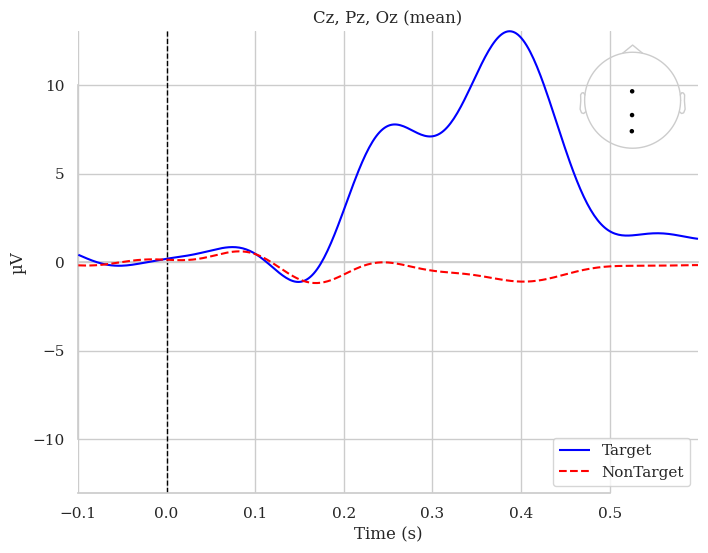

In [ ]:
# Voluntário 1
conditions = ['Target', 'NonTarget']
evokeds_1 = {c:parsed_data[0]["epochs"][c].average() for c in conditions}
plot_events(evokeds_1)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "mean"
combining channels using "mean"


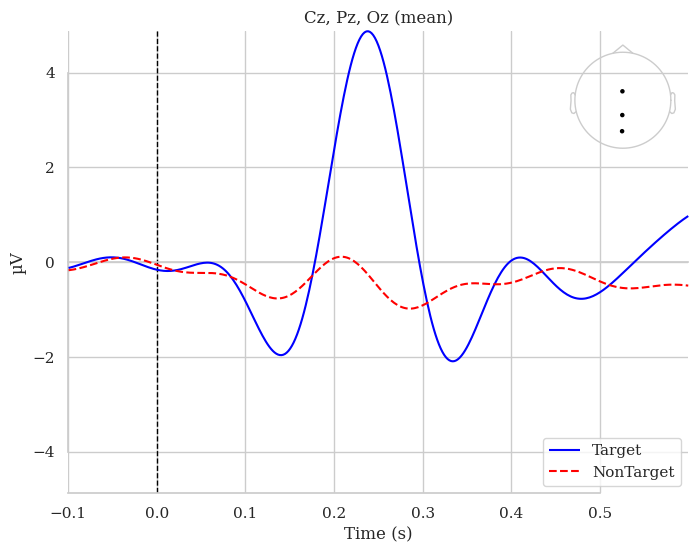

In [ ]:
# Voluntário 2
conditions = ['Target', 'NonTarget']
evokeds_2 = {c:parsed_data[1]["epochs"][c].average() for c in conditions}
plot_events(evokeds_2)

Podemos ver acima que o voluntário 1 atinge o pico de amplitude do P300, em média, por volta de 400ms, enquanto que o voluntário 2 atinge, em média, em 250ms.

Vamos agora preparar os dados para treinamento. A função *prepare_training_data* recebe os eventos, as epochs e devolve os valores X e y.

In [ ]:
def prepare_training_data(events, epochs):
    X = epochs.get_data()
    event_arr = np.array(events).flat
    event_result = [evt for evt in event_arr if evt in [33285, 33286]]
    y = np.array(event_result)
    y[y == 33286] = 0
    y[y == 33285] = 1

    return (X, y)

In [ ]:
from sklearn.model_selection import train_test_split

events_subject_1 = [item for sublist in parsed_data[0]["events"] for item in sublist]
epochs_subject_1 = parsed_data[0]["epochs"]

X, y = prepare_training_data(events_subject_1, epochs_subject_1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Iremos utilizar o modelo EEGNet, que é uma rede neural convolucional compacta criada especificamente para lidar com EEG.

Como visto anteriormente, essa rede considera o EEG como um dado bidimensional, onde a largura representa o sinal ao longo do tempo e a altura representa os canais de captura.

A convolução, neste caso, é feita espacialmente (entre canais) e temporalmente (entre pontos temporais).
- Uma convolução temporal tem o kernal do mesmo tamanho do ponto
considerado, onde a janela deslizante passa por cada canal em um intervalo de tempo definido, sumarizando a informação para cada canal neste intervalo.
- Já a convolução espacial é aplicada em todos os canais, para cada ponto temporal, sumarizando a informação de todos os canais.

As convoluções podem ser aplicadas com diferentes tamanho de kernel, com o objetivo de obter diferentes sumarizações (feature maps) dos dados originais.

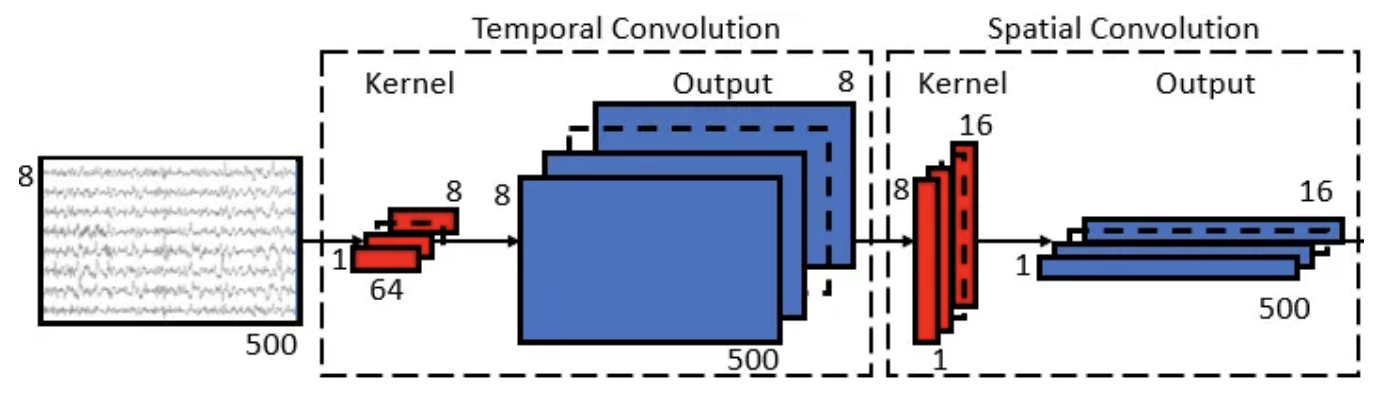

A arquitetura geral (adaptada) do modelo EEG é exibida na imagem a seguir:

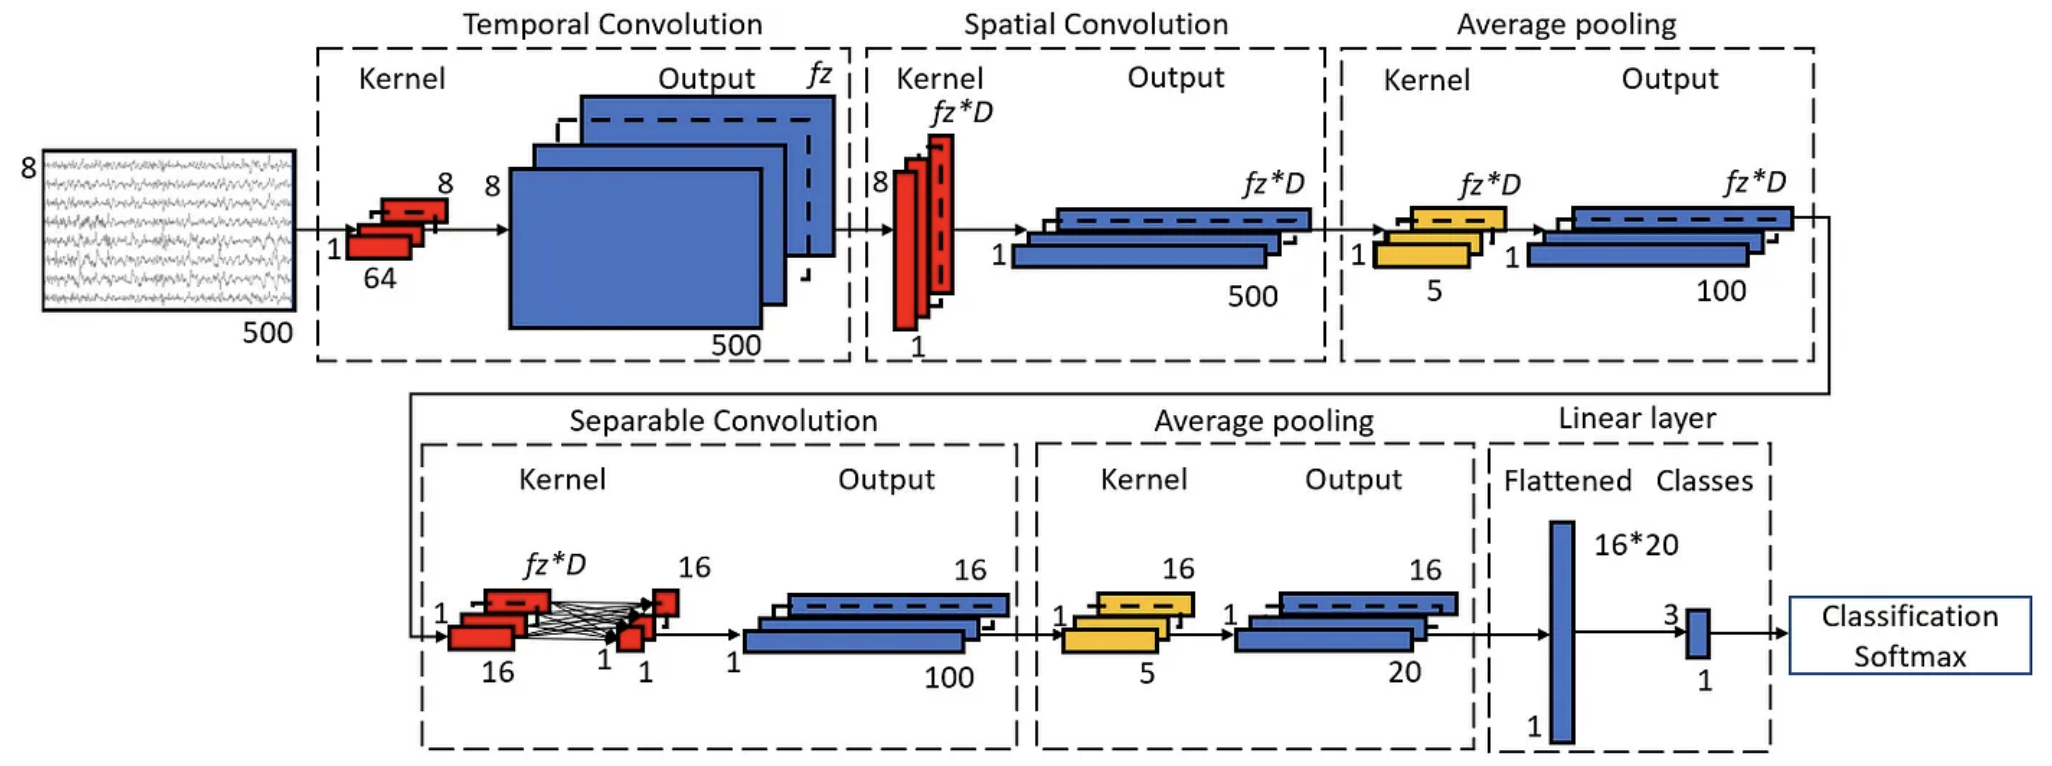

A camada de *Separable Convolution* consiste de uma junção de uma convolução temporal seguida por uma convolução 1x1 em cima de todos os kernels anteriores agrupados, essencialmente sumarizando a saída da convolução temporal em cima dos feature maps (Boer, 2022).

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

def EEGNet(nb_classes, Chans = 17, Samples = 359,
             dropoutRate = 0.5, kernLength = 180, F1 = 8,
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta

    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:

        1. Depthwise Convolutions to learn spatial filters within a
        temporal convolution. The use of the depth_multiplier option maps
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn
        spatial filters within each filter in a filter-bank. This also limits
        the number of free parameters to fit when compared to a fully-connected
        convolution.

        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions.


    While the original paper used Dropout, we found that SpatialDropout2D
    sometimes produced slightly better results for classification of ERP
    signals. However, SpatialDropout2D significantly reduced performance
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.

    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the
    kernel lengths for double the sampling rate, etc). Note that we haven't
    tested the model performance with this rule so this may not work well.

    The model with default parameters gives the EEGNet-8,2 model as discussed
    in the paper. This model should do pretty well in general, although it is
	advised to do some model searching to get optimal performance on your
	particular dataset.

    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D.

    Inputs:

      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 8, F2 = F1 * D.
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.

    """

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)

    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 32))(block2)
    block2       = dropoutType(dropoutRate)(block2)

    flatten      = Flatten(name = 'flatten')(block2)

    dense        = Dense(nb_classes, name = 'dense', activation = 'sigmoid',
                         kernel_constraint = max_norm(norm_rate))(flatten)

    return Model(inputs=input1, outputs=dense)

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError

#class_weights = {0:1, 1:1}
model = EEGNet(1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fittedModel = model.fit(X_train, y_train, epochs = 15,
                        verbose = 2, validation_data=(X_test, y_test))

Epoch 1/15
84/84 - 40s - loss: 0.5959 - accuracy: 0.8065 - val_loss: 0.5709 - val_accuracy: 0.8438 - 40s/epoch - 474ms/step
Epoch 2/15
84/84 - 46s - loss: 0.5010 - accuracy: 0.8289 - val_loss: 0.4799 - val_accuracy: 0.8438 - 46s/epoch - 548ms/step
Epoch 3/15
84/84 - 36s - loss: 0.4777 - accuracy: 0.8289 - val_loss: 0.4620 - val_accuracy: 0.8438 - 36s/epoch - 423ms/step
Epoch 4/15
84/84 - 36s - loss: 0.4685 - accuracy: 0.8289 - val_loss: 0.4442 - val_accuracy: 0.8438 - 36s/epoch - 424ms/step
Epoch 5/15
84/84 - 40s - loss: 0.4648 - accuracy: 0.8289 - val_loss: 0.4416 - val_accuracy: 0.8438 - 40s/epoch - 481ms/step
Epoch 6/15
84/84 - 51s - loss: 0.4601 - accuracy: 0.8289 - val_loss: 0.4308 - val_accuracy: 0.8438 - 51s/epoch - 601ms/step
Epoch 7/15
84/84 - 36s - loss: 0.4568 - accuracy: 0.8289 - val_loss: 0.4289 - val_accuracy: 0.8438 - 36s/epoch - 426ms/step
Epoch 8/15
84/84 - 41s - loss: 0.4537 - accuracy: 0.8289 - val_loss: 0.4226 - val_accuracy: 0.8438 - 41s/epoch - 483ms/step
Epoch 9/

Após o treinamento acima, atingimos uma acurácia de 84,38% utilizando o EEGNet.

# Referências

https://www.researchgate.net/publication/321393429_Detecting_Vigilance_in_People_Performing_Continual_Monitoring_Task

https://towardsdatascience.com/convolutional-neural-networks-for-eeg-brain-computer-interfaces-9ee9f3dd2b81